# Investigate Medical Appointment Dataset
<br><br>
In this notebook we will try to analyze why would some patient not show up for his medical appointment and whether there are reasons for that using the data we have.<br>
We will try to find some correlation between the different attributes we have and whether the patient shows up or not. The dataset we are going to use contains 110.527 medical appointments and its 14 associated variables ( **PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap', SMS_received, No-show** )

## Questions to answer

*   What is the percentage of no-show?
*   What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
    *   Is the time gender related to whether a patient will show or not?
    *   Does alcoholism affect probability of showing up?
    *   Are patients with scholarship more likely to miss their appointment?
    *   Are patients who don't recieve sms more likely to miss their appointment?
    *   Is the time difference between the scheduling and appointment related to whether a patient will show?
    *   Does age affect whether a patient will show up or not?
    *   What is the percentage of patients missing their appointments for every neighbourhood


## Setup

In [1]:
# Importing the required modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# make sure the plots are inline with the notebook
%matplotlib inline

## Engaging with the Data

###  Loading the dataset 

In [2]:
df = pd.read_csv("no-showappointments.csv")
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
90859,2.868581e+13,5734378,F,2016-05-24T15:28:26Z,2016-06-01T00:00:00Z,93,CENTRO,0,1,0,0,0,1,Yes
68368,6.465493e+12,5695299,F,2016-05-13T09:56:05Z,2016-05-13T00:00:00Z,73,MARIA ORTIZ,0,0,0,0,0,0,No
79600,2.114888e+14,5601902,M,2016-04-19T13:55:03Z,2016-05-05T00:00:00Z,54,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No
74372,4.372877e+12,5666659,F,2016-05-05T20:16:52Z,2016-05-09T00:00:00Z,42,JARDIM CAMBURI,0,0,0,0,0,0,No
18878,3.542395e+12,5659530,F,2016-05-04T14:09:12Z,2016-05-13T00:00:00Z,34,FORTE SÃO JOÃO,0,0,0,0,0,0,No


### Exploring the dataset

In [3]:
print("shape :",df.shape)
df.dtypes

shape : (110527, 14)


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

There are **110527 rows** in the dataset along with **14 columns** <br>
Except 2 columns (Neighbourhood and No-show) all other columns are of numeric type

In [4]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Checking for null and duplicate data

In [5]:
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
df.duplicated().any()

False

#### Note from exploring the data

There are some columns that need to have their datatype corrected like dates. Another great finding is that our data doesn't have any duplicated or missing values. Also, the column no-show can be a bit confusing and we can invert the values to make it more intuitive (shownup instead of no-show) and we can also turn it into integer instead of yes or no, thereby converting it to categorical datatype instead of object.

### Data Cleaning

*   Drop irrelevant columns
*   Modify column names
*   Correct data types
*   Invert no-show column in to show with integer values
*   Create a new column for days difference between scheduling an appointment


In [7]:
# Drop irrelevant columns : PatientId and AppointmentID do not add much value to our analysis, and therefore can be dropped
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Modifying all column names : Change all cloumns name to lower case and replace all - with _
df.columns=df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)

,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
5,scholarship
6,hipertension
7,diabetes
8,alcoholism
9,handcap


In [9]:
# Change datatype for columns with date :

df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [10]:
### Turn no_show column to shownup
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df.no_show=df.no_show.map({'No':1,'Yes':0})
df.rename(columns={'no_show':'shownup'},inplace=True)
print(df.shownup.unique())
df.head()

[1 0]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shownup
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [12]:
# Create a new column for days difference between scheduling and appointment
day_diff=(df.appointmentday.dt.date-df.scheduledday.dt.date).dt.days 
df.insert(3,'day_diff',day_diff)
print(df.day_diff.dtype)

df.dtypes

int64


gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
day_diff                        int64
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
shownup                         int64
dtype: object

In [13]:
df.head(5)

,gender,scheduledday,appointmentday,day_diff,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shownup
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1


### Exploratory Data Analysis

#### checking the correlation between columns data

In [14]:
df.corr()

,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shownup
day_diff,1.000000,0.034820,-0.030421,-0.017215,-0.027188,-0.038519,-0.019843,0.398145,-0.186231
age,0.034820,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,0.060319
scholarship,-0.030421,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,-0.029135
hipertension,-0.017215,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,0.035701
diabetes,-0.027188,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,0.015180
alcoholism,-0.038519,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,0.000196
handcap,-0.019843,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,0.006076
sms_received,0.398145,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,-0.126431
shownup,-0.186231,0.060319,-0.029135,0.035701,0.015180,0.000196,0.006076,-0.126431,1.000000


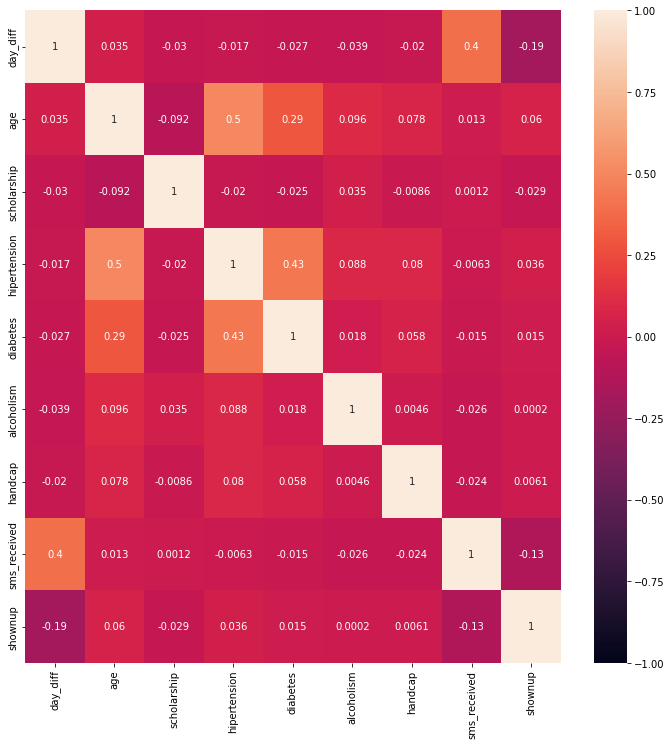

In [15]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), vmin = -1, annot = True)
plt.savefig("plots/Correlation Heatmap", dpi = 200)
plt.show()

There seems to not much of a significant corrrelation between the columns of the dataset

#### Checking the distribution of the data

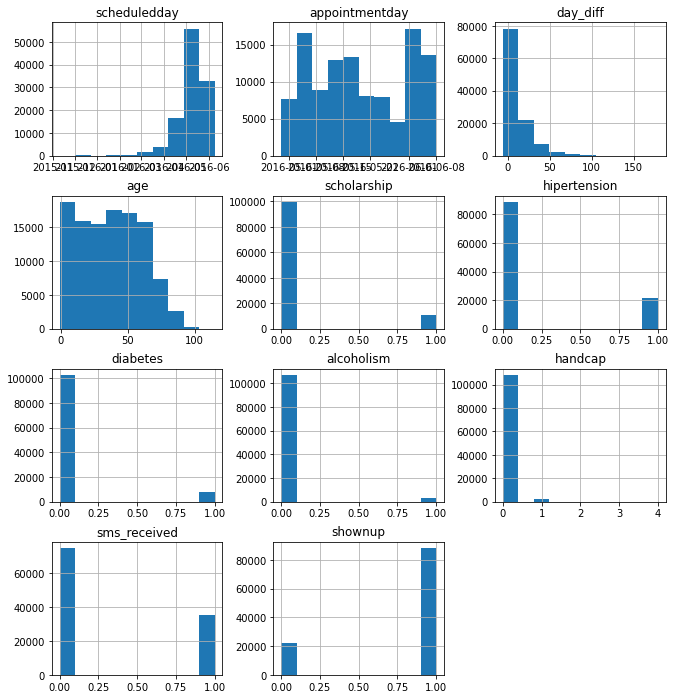

In [16]:
df.hist(figsize=(11,12), alpha = 1);

In [17]:
# Writing a general function to get the ratio of show in different categories :
def plot_rat(x):
    df.groupby(x)[['shownup']].mean().plot(kind='bar',
                                    edgecolor='black', legend = False, 
                                    figsize=(8,6)).set_ylabel('Ratio of people shownup');
    display(df.groupby(x)[['shownup']].mean())

### Percentage of people who did not show up 

In [18]:
(1 - df.shownup.mean())* 100

20.193255946510803

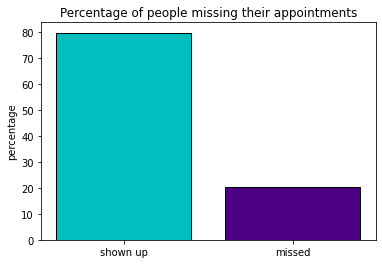

20.19  % of people have missed the appointments
79.81 % of people have attended to their appointments


In [19]:
show = len(df[df['shownup']== 1])/ len(df['shownup'])
noshow = len(df[df['shownup']== 0])/ len(df['shownup'])
plt.bar(['shown up', 'missed'],[show*100 , noshow* 100] ,color =['c', 'indigo'], edgecolor = 'black')
plt.title("Percentage of people missing their appointments")
plt.ylabel('percentage')
plt.savefig("plots/missed_percent", dpi = 200)

plt.show()
print("%.2f"%(noshow*100) ," % of people have missed the appointments")
print("%.2f"%(100-(noshow*100)),"% of people have attended to their appointments")

#### Note
**20.19 %** of people have missed the appointments<br>
**79.81 %** of people have attended to their appointments

In [20]:
df.shownup == 1

0         True
1         True
2         True
3         True
4         True
          ... 
110522    True
110523    True
110524    True
110525    True
110526    True
Name: shownup, Length: 110527, dtype: bool

#### creating filters for the shownup columns

In [21]:
shownup = (df.shownup == 1) 
missed = (df.shownup == 0)
total_miss = len(df[missed])
total = len(df)

### Q1) Is there a relation between gender and missed appointments

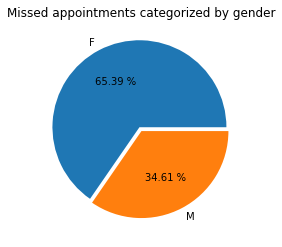

,gender
M,7725
F,14594


In [22]:
missed_gender = df[missed]['gender'].value_counts()
plt.pie(missed_gender , labels = missed_gender.index.values, 
                    autopct = '%.2f %%', explode = [0.05, 0])
plt.title('Missed appointments categorized by gender')
plt.savefig("plots/shownup_gender_pie", dpi = 200)
plt.show()
display(pd.DataFrame(missed_gender.sort_values()))

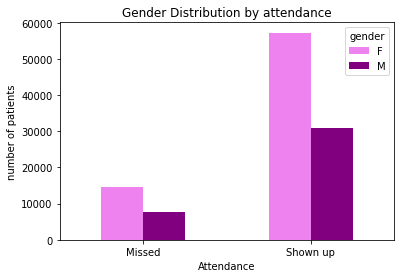

In [23]:
df.groupby(['gender','shownup']).size().unstack('gender').plot(kind='bar', rot = 0,  
                            ylabel ='number of patients', color = ['violet', 'purple'])
plt.title("Gender Distribution by attendance")
plt.xlabel("Attendance")
plt.xticks(range(0,2),['Missed','Shown up'])
plt.savefig('plots/shownup_gender_bar', dpi = 200)
plt.show()

It seems that the number missing appointments in case of female is almost twice that in case of males. <br>
However, it is necessary to find out the number of datapoints per gender in the dataset.

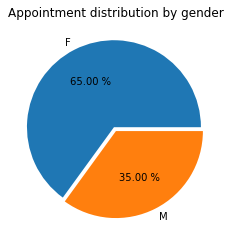

,gender
F,71840
M,38687


In [24]:
plt.pie(df['gender'].value_counts(), labels = df.gender.value_counts().index.values,
                                autopct = "%.2f %%", explode = [0.05, 0])
plt.title("Appointment distribution by gender")
plt.show()

display(pd.DataFrame(df['gender'].value_counts()))

From the above analysis we conclude that the better technique will be to calculate the proportions of people who did or did not show up for a given criteria

In [25]:
""" Writing a general function which will calculate proportions of people
who did and didnt showup for specific columns using groupby and value_count functions """

def proportional(x) : 
    table = df.groupby(x)['shownup'].value_counts(normalize = True).mul(100).round(2).unstack("shownup") 
    return table    
        

shownup,0,1
gender,,
F,20.31%,79.69%
M,19.97%,80.03%


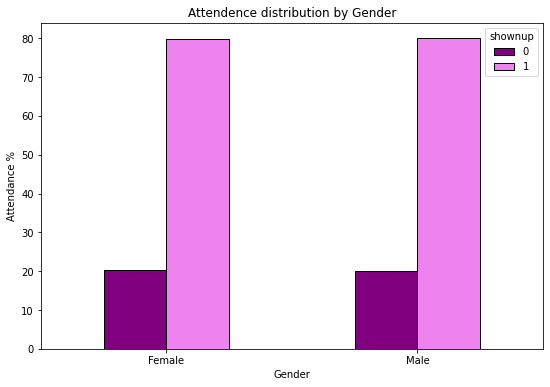

In [26]:
prop_gender = proportional('gender')
display(prop_gender.astype(str) + '%')
prop_gender.plot(kind = 'bar', color = ['purple', 'violet'], 
                 rot = 0, figsize = (9,6),edgecolor = 'black' )
plt.title("Attendence distribution by Gender")
plt.ylabel("Attendance %")
plt.xlabel("Gender")
plt.xticks(range(0,2),["Female","Male"])

plt.savefig("plots/prop_gender", dpi = 200)
plt.show()

#### **Inference**
The analysis shows that females usually have more appointments than male patient. the number of females in the dataset is also almost twice that of the male. This explins the trend of females missing higher number of appointments. Females, making up 65 percent of the dataset, also comprise of around 65% of the missed appointments. <br>
That means there's no direct correlation between Gender and attendance & both genders have the same commitment to attend the medical appointment !!

### Q2) How the Alcoholism affects probability of showing up?

#### Checking the function for alcoholism column

shownup,0,1
alcoholism,,
0,20.19%,79.81%
1,20.15%,79.85%


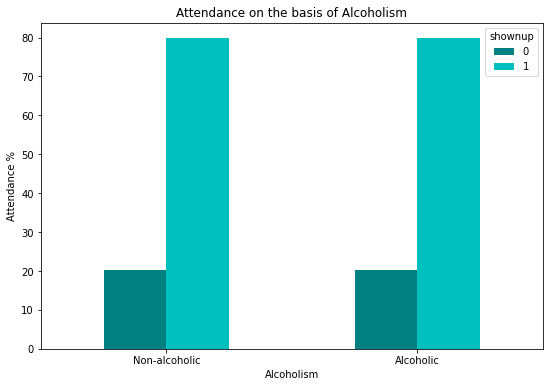

In [27]:
prop_alcohol = proportional('alcoholism')
display(prop_alcohol.astype(str) + '%')
prop_alcohol.plot(kind = 'bar', color = ['teal', 'c'], rot = 0, figsize = (9,6))
plt.title("Attendance on the basis of Alcoholism")
plt.xlabel("Alcoholism")
plt.ylabel("Attendance %")
labels = ["Non-alcoholic", "Alcoholic"]
plt.xticks(range(len(labels)),labels)

plt.savefig("plots/prop_alcoholism", dpi = 200)
plt.show()

#### Insights

From the above visualisation we can conclude the attendance rate  for both alcoholic & not alcoholic patients is quite similar . **79.85%** of all alcoholic patients attended to their appointmets, while **79.81** % of all non - alcoholic patients attended their appointmets.<br> 
So this means thatboth alcoholic and non-alcoholic patients have same commitment to attend the medical appointments and that there is no direct correlation between alcoholism and attendance

### Q3 Are patients with scholarships more likely to miss their appointment ?

[]

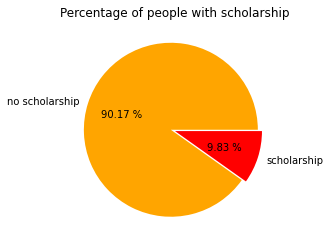

In [28]:
df['scholarship'].value_counts(normalize = True).plot(kind = 'pie',
                colors = ['orange' ,'r'], autopct = '%.2f %%',
                labels = ['no scholarship', 'scholarship'], explode = [0.05, 0.0])

plt.title("Percentage of people with scholarship")
plt.ylabel("")
plt.plot()

shownup,0,1
scholarship,,
0,19.81%,80.19%
1,23.74%,76.26%


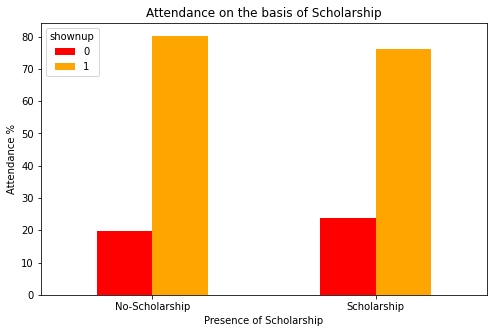

In [29]:
prop_scholarship = proportional('scholarship')
display(prop_scholarship.astype(str) + '%')
prop_scholarship.plot(kind = 'bar', color = ['r', 'orange'], rot = 0, figsize = (8,5))
plt.title("Attendance on the basis of Scholarship")
plt.xlabel("Presence of Scholarship")
plt.ylabel("Attendance %")
labels = ["No-Scholarship", "Scholarship"]
plt.xticks(range(len(labels)),labels)

plt.savefig("plots/prop_scholarship", dpi = 200)
plt.show()

#### Insights

More than 90% of the patients do not have any scholarship. **23.74 %** of people with scholarship did not attend their appointmets, while the same is true for **19.81 %** of the people without scholarship. So, even though higher percentage of people with scholarship seem to miss the appointment, the difference is quite small, and along with the fact that the ratio between people with and without scholarship is skewed, it means that no significant conclusion can be drawn ! So there is no direct correlation between Hypertensive and attendance also.

In [30]:
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'day_diff', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'shownup'],
      dtype='object')

### Q3 How Hipertension effects showing up

shownup,0,1
hipertension,,
0,20.9%,79.1%
1,17.3%,82.7%


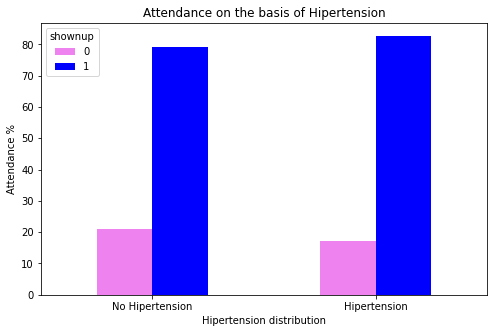

In [31]:
prop_hipertension = proportional('hipertension')
display(prop_hipertension.astype(str) + '%')
prop_hipertension.plot(kind = 'bar', color = ['violet', 'b'], rot = 0, figsize = (8,5))
plt.title("Attendance on the basis of Hipertension")
plt.xlabel("Hipertension distribution")
plt.ylabel("Attendance %")
labels = ["No Hipertension", "Hipertension"]
plt.xticks(range(len(labels)),labels)

plt.savefig("plots/prop_hipertension", dpi = 200)
plt.show()

#### Insights

From above visualisation we can conclude the attendance rate is very similar for both patients who do and don't have Hipertension. They have the same commitment to attend the medical appointment.
Percentage of patients who has Hipertension and attended is **82.69%** of patients with hipertension have attended their appointments while  **79.09%** of the patients whithout hipertension did. So, there is no direct correlation between Hypertensive and attendance also.

### Are patients who don't receive SMS more likely to miss their appointment?

shownup,0,1
sms_received,,
0,16.7%,83.3%
1,27.57%,72.43%


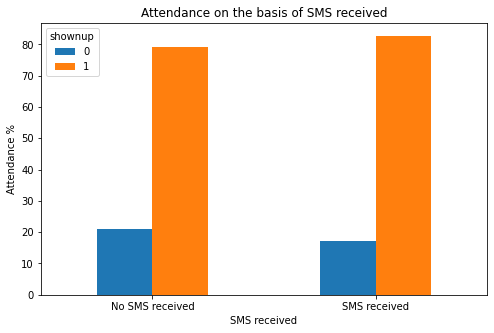

In [32]:
prop_sms = proportional('sms_received')
display(prop_sms.astype(str) + '%')
prop_hipertension.plot(kind = 'bar', rot = 0, figsize = (8,5))
plt.title("Attendance on the basis of SMS received")
plt.xlabel("SMS received")
plt.ylabel("Attendance %")
labels = ["No SMS received", "SMS received"]
plt.xticks(range(len(labels)),labels)

plt.savefig("plots/prop_sms", dpi = 200)
plt.show()

#### Insights

**16.70 %** of people who did not receive the sms missed their appointment, while **27.57 %** of people missed their appoinment despite receiving an sms. A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !!
This is contrary to the belief, as receiving an sms reminds people of the appointment, therefore, increasing the chances of attending it

### Is the time difference between the scheduling and appointment related to whether a patient will show up ?

In [33]:
np.sort(df['day_diff'].unique())

array([ -6,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103,
       104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123,
       125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176,
       179], dtype=int64)

There are more than negative values in the column (-6 and -1) which seems to be a mistake in the data, as it implies the appointment date is before the scheduled date which is not possible.<br>
so, creating a new database without wrong data in this column

In [34]:
df2 = df[df.day_diff >= 0 ]
print("maximum appointment delay = ", df2.day_diff.max(), " days")
df2.day_diff.value_counts().head(10)

maximum appointment delay =  179  days


0     38563
2      6725
4      5290
1      5213
7      4906
6      4037
5      3277
14     2913
3      2737
8      2332
Name: day_diff, dtype: int64

There is a large percentage of people with 0 days of difference between scheduling and appointment

[]

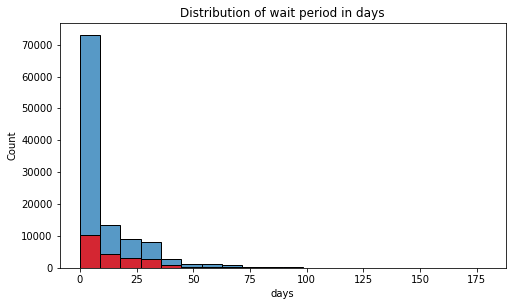

In [35]:
plt.figure(figsize = (8,4.5))
sns.histplot(df2.day_diff, bins = 20)
sns.histplot(df2[df2['shownup'] == 0].day_diff, bins = 20 , color = 'red')
plt.title('Distribution of wait period in days' )
plt.xlabel("days")

plt.savefig("plots/waitdayhist", dpi = 200)
plt.plot()

In [36]:
bin_edges=[-1,0,7,14,31,df.day_diff.max()]
names=['sameday','a week','two weeks','month','more than a month']
df["wait_period"] = pd.cut(df.day_diff,bin_edges,labels=names)

shownup,0,1
wait_period,,
sameday,4.65%,95.35%
a week,24.15%,75.85%
two weeks,30.47%,69.53%
month,32.59%,67.41%
more than a month,33.02%,66.98%


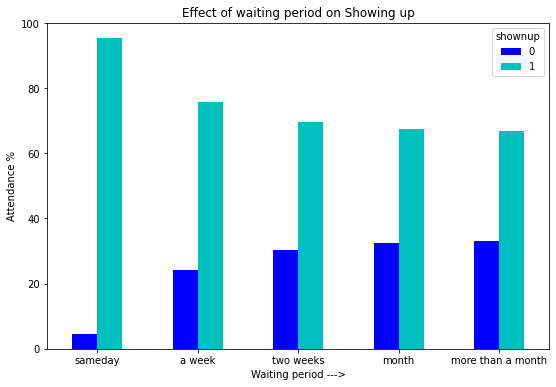

In [37]:
prop_waitday = proportional('wait_period')
display(prop_waitday.astype(str) + '%')
prop_waitday.plot(kind = 'bar', color = ['b', 'c'], rot = 0, figsize = (9,6))
plt.title("Effect of waiting period on Showing up")
plt.xlabel("Waiting period --->")
plt.ylabel("Attendance %")
plt.xticks(range(len(names)),names)

plt.savefig("plots/prop_wait_period" , dpi = 200)
plt.show()

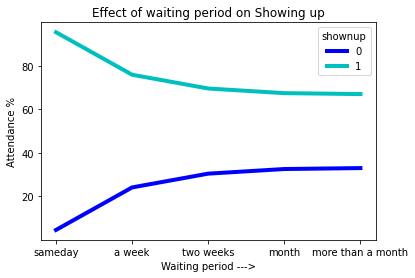

In [38]:
prop_waitday.plot(kind = 'line', linewidth = 4, color = ['b', 'c'])
plt.title("Effect of waiting period on Showing up")
plt.xlabel("Waiting period --->")
plt.ylabel("Attendance %")
plt.xticks(range(len(names)),names)
plt.show()

#### Insights

The above visualization indicates an important trend ! As the waiting period for the appointment date increases, the percentage of patients not showing up for their appointments also increases ! For appointment on the same day as that of scheduling it **95.35 %** of the patients show up for their appointments, as opposed to a break of a week, when the attendance reduces to **69.53 %**. After a waiting period of more than a month, the attendance furthur decreases to **66.98 %**. <br>
Therefore it appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.

## Conclusions

* 79.81 % from all patients attend and 20.19 % didnt attend their appoinments

* Females make up about 2/3 of the total appointments

* Gender has no direct correlation with attendance.

* Alcoholism has no direct correlation with attendance.

* Hypertension has no direct correlation with attendance.

* Scholarship has no direct correlation with attendance

* The attendance rate for patient who have not recieved SMS is higher (This result is unexpected)    

* Appointment delay also can affect the attendance rate. the longer the period between the scheduling and appointment the more likely the patient won't show up..this factor is very important and can help us alot to make better prediction

## Analysis Shortcoming & Data Limitations
* The data doesn't state the exact hour of the appointment which would have been very useful to try to find out which hours have the most missing appointments and which doesn't. It could also be very useful to know the difference between scheduling and the appointment since many of the scheduling are on the same day.
* The data doesn't state if any day is a vacation or not which can indicate if people tend to miss their appointments more on working days.
* The age column had a negative value but according to the data creator, it means a baby not born yet (a pregnant woman).
* When calculating the day difference between the scheduling and appointment days we had some negative value which makes no sense and might mean that the records of questions have wrong data.